In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from qrcodegen import QRCodeGen, QRCodeMarkup
from dataset import QrDataset


In [2]:
generator = QRCodeGen()
markup = QRCodeMarkup()

In [3]:
DATASET_DIR = "./qr-code-dataset/"

DATASET_SIZE = 10
for i in range(DATASET_SIZE):
    code = generator()
    markup.save(code, DATASET_DIR)
    

In [4]:
dataset = QrDataset(DATASET_DIR)

In [5]:
def visualize(img, markups):
    figure = plt.figure(figsize=(10, 10))
    rows, cols = 2, 2

    figure.add_subplot(rows, cols, 1)
    plt.title('qr-code')
    plt.axis("off")
    plt.imshow(Image.fromarray(img), cmap="gray")

    for i, mark in enumerate(markups.keys()):
        i += 2

        figure.add_subplot(rows, cols, i)
        plt.title(mark)
        plt.axis("off")
        plt.imshow(markups[mark].squeeze(), cmap="gray")
    plt.show()

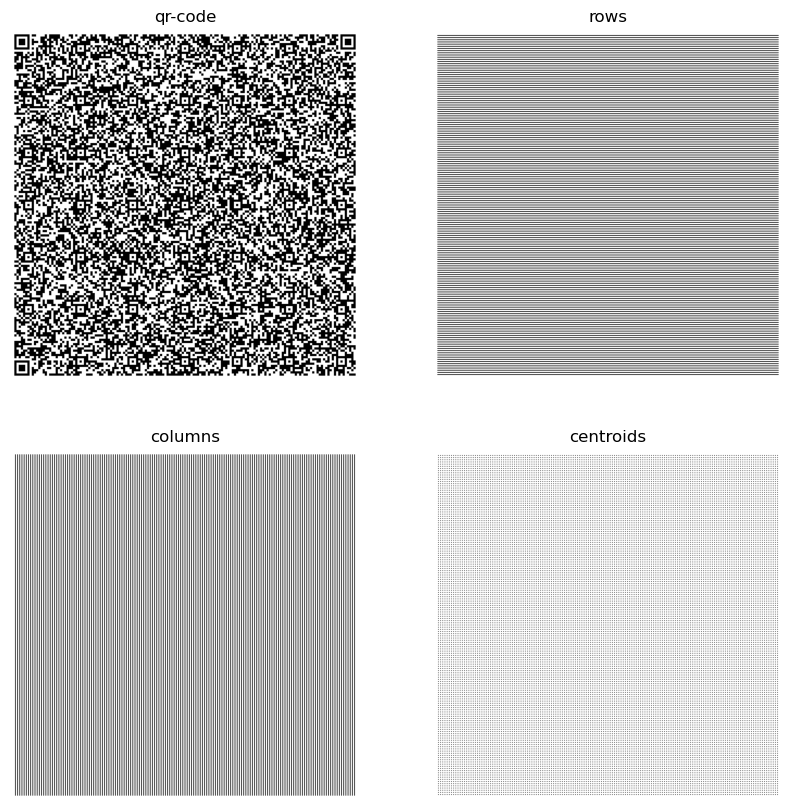

In [15]:
sample_idx = torch.randint(len(dataset), size=(1,)).item()
img, markups = dataset[sample_idx]
visualize(
    img=img,
    markups=markups
)